# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [1]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
# 데이터 로드
data = pd.read_csv("/content/drive/MyDrive/ESAA/data/abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

In [53]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,True,False,False
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,True,False,False
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,False,True,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,True,False,False
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,False,False,True


## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [54]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [55]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, random_state=156)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [56]:
#필요한 모듈 불러오기
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [57]:
#릿지모델 생성 및 훈련
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)

#예측값 구하기
y_preds = ridge.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
y_preds = ridge.predict(X_test) + 1.5
print(y_pred)

#MSE와 RMSE구하기
MSE = mean_squared_error(y_test, y_preds)
RMSE = np.sqrt(MSE)
print(RMSE)

[2 1 2 1 1 2 0 2 2 1 2 2 2 0 0 2 1 1 0 1 2 2 2 2 1 2 2 0 0 0 0 0 2 1 2 1 1
 0 1 1 2 2 0 0 1 0 0 1 1 1 1 2 2 1]
2.6834133013759205


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [23]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [25]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
#cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
from sklearn.metrics import make_scorer

for alpha in alphas:
    ridge = Ridge(alpha=alpha)

    # 교차 검증 (5 폴드)으로 MSE 계산 (음수 MSE 반환 -> 양수로 변환)
    mse_scores = cross_val_score(ridge, X_train, y_train,
                                 scoring=make_scorer(mean_squared_error),
                                 cv=5)

    # RMSE 계산 (MSE의 제곱근)
    rmse_scores = np.sqrt(mse_scores)
    mean_rmse = np.mean(rmse_scores)  # 평균 RMSE 계산

    print(f"Alpha: {alpha}, Mean RMSE: {mean_rmse:.4f}")



Alpha: 0, Mean RMSE: 2.2504
Alpha: 0.1, Mean RMSE: 2.2204
Alpha: 1, Mean RMSE: 2.2190
Alpha: 10, Mean RMSE: 2.4404
Alpha: 100, Mean RMSE: 2.6239


## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [26]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd


4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [27]:
#모델 생성 및 훈련
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

#예측값 구하기
y_pred = xgb.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
y_pred = y_pred + 1.5

#MSE와 RMSE 구하기
mse = mean_squared_error(y_test, y_pred)  # 평균 제곱 오차
rmse = np.sqrt(mse)
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


MSE: 8.0405
RMSE: 2.8356


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

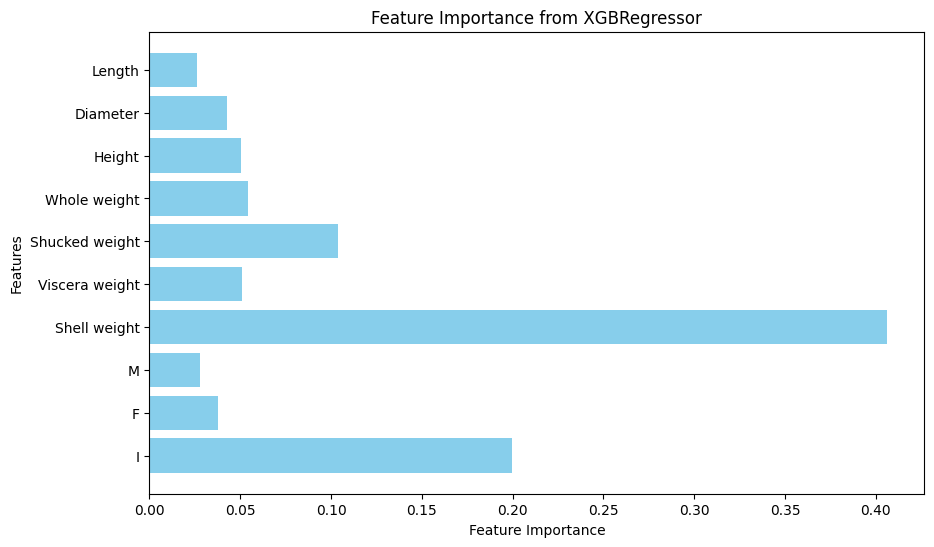

In [29]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# 특성 중요도 가져오기
feature_importance = xgb.feature_importances_

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(data.columns, feature_importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance from XGBRegressor")
plt.gca().invert_yaxis()  # 중요도가 높은 특성이 위로 오도록 정렬
plt.show()


---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [30]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [39]:
wine = load_wine()
wine_x = wine.data # x변수
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [41]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

x_train.shape
y_train.shape

(124,)

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [44]:
from sklearn.linear_model import LogisticRegression
# 로지스틱 회귀 모델 생성
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# 모델 훈련
log_reg.fit(x_train, y_train)

# 테스트 데이터로 예측
y_pred = log_reg.predict(x_test)


3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [47]:
#기울기
print("기울기 (회귀 계수):")
print(log_reg.coef_)

기울기 (회귀 계수):
[[-5.43540490e-01  5.49421440e-01  5.53576129e-01 -2.76282544e-01
  -8.59673464e-05  1.97346576e-01  9.12652727e-01  7.17889129e-02
  -3.49531117e-02  9.15703016e-02 -1.74383021e-01  5.09963709e-01
   9.61662254e-03]
 [ 6.09851769e-01 -9.12551548e-01 -5.85113008e-01  2.24916150e-01
  -2.28483438e-02  3.16349549e-01 -8.44700019e-03  1.44268211e-01
   5.32954225e-01 -8.01810388e-01  6.07654660e-01  1.94172207e-01
  -7.80220473e-03]
 [-6.63112792e-02  3.63130108e-01  3.15368791e-02  5.13663945e-02
   2.29343112e-02 -5.13696125e-01 -9.04205727e-01 -2.16057123e-01
  -4.98001114e-01  7.10240086e-01 -4.33271639e-01 -7.04135916e-01
  -1.81441781e-03]]


In [46]:
#절편
print("\n절편:")
print(log_reg.intercept_)


절편:
[-0.82821037  1.12186432 -0.29365395]


3-3) 모델의 정확도를 구하세요.

In [48]:
#모델의 예측값 구하기
from sklearn.metrics import accuracy_score
# 테스트 데이터로 예측
y_pred = log_reg.predict(x_test)
print(y_pred)
#모델의 정확도 구하기
# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"모델의 정확도: {accuracy:.4f}")

[2 1 2 1 1 2 0 2 2 1 2 2 2 0 0 2 1 1 0 1 2 2 2 2 1 2 2 0 0 0 0 0 2 1 2 1 1
 0 1 1 2 2 0 0 1 0 0 1 1 1 1 2 2 1]
모델의 정확도: 0.9444
